<a href="https://colab.research.google.com/github/Smart-Pigs/Cow_Food_Consumption/blob/main/Correlation_Check_6065.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Mount Google Drive 
from google.colab import drive
drive.mount('/content/gdrive',force_remount=True)

Mounted at /content/gdrive


In [2]:
#Change path
import os
path = '/content/gdrive/MyDrive/Cow_eating_label/'
os.chdir(path)

In [3]:
import glob
import numpy as np
import pandas as pd

In [4]:
ls Cow6065/Final/featured/

Test_cow6065_1pm_to_5pm_1/  Test_cow6065_9am_to_1pm_1/
Test_cow6065_1pm_to_5pm_2/  Test_cow6065_9am_to_1pm_2/
Test_cow6065_5pm_to_9pm/    Test_cow6065_9pm_to_12am/


In [5]:
ls Cow6065/Final/featured/Test_cow6065_1pm_to_5pm_1/

X_test_cow6065_1pm_to_5pm_1.csv   y_test_cow6065_1pm_to_5pm_1.csv
X_train_cow6065_1pm_to_5pm_1.csv  y_train_cow6065_1pm_to_5pm_1.csv


In [6]:
df_ex = pd.read_csv("Cow6065/Final/featured/Test_cow6065_9am_to_1pm_1/y_test_cow6065_9am_to_1pm_1.csv",header=None)
df_ex[0].value_counts()['eating']

134

In [7]:
df_ex = pd.read_csv("Cow6065/Final/featured/Test_cow6065_1pm_to_5pm_1/y_test_cow6065_1pm_to_5pm_1.csv",header=None)
df_ex[0].value_counts()['eating']

588

In [8]:
df_ex = pd.read_csv("Cow6065/Final/featured/Test_cow6065_5pm_to_9pm/y_test_cow6065_5pm_to_9pm.csv",header=None)
df_ex[0].value_counts()['eating']

456

In [9]:
df_ex = pd.read_csv("Cow6065/Final/featured/Test_cow6065_9pm_to_12am/y_test_cow6065_9pm_to_12am.csv",header=None)
df_ex[0].value_counts()['eating']

605

In [10]:
df_ex = pd.read_csv("Cow6065/Final/featured/Test_cow6065_9am_to_1pm_2/y_test_cow6065_9am_to_1pm_2.csv",header=None)
df_ex[0].value_counts()['eating']

920

In [11]:
df_ex = pd.read_csv("Cow6065/Final/featured/Test_cow6065_1pm_to_5pm_2/y_test_cow6065_1pm_to_5pm_2.csv",header=None)
df_ex[0].value_counts()['eating']

207

In [12]:
import pandas as pd

data = {'block': ['y_test_cow6065_9am_to_1pm_1', 'y_test_cow6065_1pm_to_5pm_1', 'y_test_cow6065_5pm_to_9pm','y_test_cow6065_9pm_to_12am','y_test_cow6065_9am_to_1pm_2','y_test_cow6065_1pm_to_5pm_2'],
        'number of eating events': [134,588,456,605,920,207],
        'intake': [34.4,20,28.4,18.8,44,20.2]}

df = pd.DataFrame(data)

# Calculate correlation between 'number of eating events' and 'intake'
correlation = df['number of eating events'].corr(df['intake'])

print(f"Correlation: {correlation:.2f}")


Correlation: 0.34


slope b1 is 0.011893348734238158
intercept b0 is 21.865059197227822
0.11621680815108659
Slope: [0.01189335]
Intercept: 21.86505919722783
MAPE: 0.30076388991686304
Root mean squared error:  8.631450694497369
R2 score:  0.11621680815108659


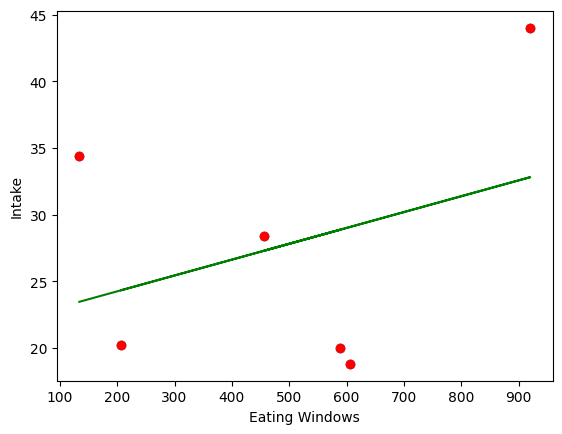

In [13]:
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error
import statsmodels.api as sm

X = np.array([134,588,456,605,920,207])
Y = np.array([34.4,20,28.4,18.8,44,20.2])
n = np.size(X)
  
x_mean = np.mean(X)
y_mean = np.mean(Y)
x_mean,y_mean
  
Sxy = np.sum(X*Y)- n*x_mean*y_mean
Sxx = np.sum(X*X)-n*x_mean*x_mean
  
b1 = Sxy/Sxx
b0 = y_mean-b1*x_mean
print('slope b1 is', b1)
print('intercept b0 is', b0)
  
plt.scatter(X,Y)
plt.xlabel('Independent variable X')
plt.ylabel('Dependent variable y')

y_pred = b1 * X + b0

plt.scatter(X, Y, color = 'red')
plt.plot(X, y_pred, color = 'green')
plt.xlabel('Eating Windows')
plt.ylabel('Intake')

X = X.reshape(-1,1)
regression_model = LinearRegression()

# Fit the data(train the model)
regression_model.fit(X, Y)
print(regression_model.fit(X, Y).score(X,Y))
# Predict
y_predicted = regression_model.predict(X)

# model evaluation
mape=mean_absolute_percentage_error(Y,y_predicted)

rmse = np.sqrt(mean_squared_error(Y, y_predicted))
r2 = r2_score(Y, y_predicted)

# printing values
print('Slope:' ,regression_model.coef_)
print('Intercept:', regression_model.intercept_)
print('MAPE:',mape)
print('Root mean squared error: ', rmse)
print('R2 score: ', r2)


#Two cow added together

slope b1 is 0.03342102499668219
intercept b0 is 7.895415822752749
0.6399057769377954
Slope: [0.03342102]
Intercept: 7.895415822752739
MAPE: 0.3872232830692161
Root mean squared error:  8.913615762646467
R2 score:  0.6399057769377954


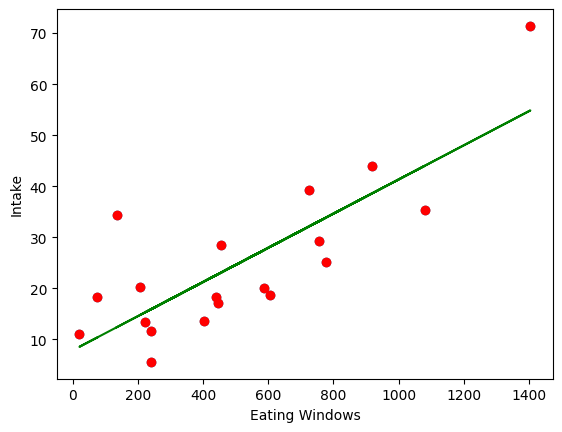

In [14]:
X = np.array([134,588,456,605,920,207,1405, 402, 240,776,725,438,222,445,757,1080,241,20,75])
Y = np.array([34.4,20,28.4,18.8,44,20.2,71.4, 13.6, 11.6, 25.2,39.2,18.4,13.4,17.2,29.2,35.4,5.6,11, 18.4])
n = np.size(X)
  
x_mean = np.mean(X)
y_mean = np.mean(Y)
x_mean,y_mean
  
Sxy = np.sum(X*Y)- n*x_mean*y_mean
Sxx = np.sum(X*X)-n*x_mean*x_mean
  
b1 = Sxy/Sxx
b0 = y_mean-b1*x_mean
print('slope b1 is', b1)
print('intercept b0 is', b0)
  
plt.scatter(X,Y)
plt.xlabel('Independent variable X')
plt.ylabel('Dependent variable y')

y_pred = b1 * X + b0

plt.scatter(X, Y, color = 'red')
plt.plot(X, y_pred, color = 'green')
plt.xlabel('Eating Windows')
plt.ylabel('Intake')

X = X.reshape(-1,1)
regression_model = LinearRegression()

# Fit the data(train the model)
regression_model.fit(X, Y)
print(regression_model.fit(X, Y).score(X,Y))
# Predict
y_predicted = regression_model.predict(X)

# model evaluation
mape=mean_absolute_percentage_error(Y,y_predicted)

rmse = np.sqrt(mean_squared_error(Y, y_predicted))
r2 = r2_score(Y, y_predicted)

# printing values
print('Slope:' ,regression_model.coef_)
print('Intercept:', regression_model.intercept_)
print('MAPE:',mape)
print('Root mean squared error: ', rmse)
print('R2 score: ', r2)
